In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

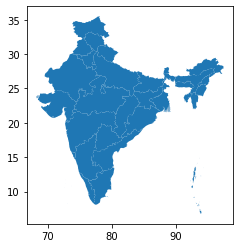

In [2]:
fp = "./shape files/IND_adm1.shp"

map_df = gpd.read_file(fp)

map_df.plot()

In [3]:
df = pd.read_csv("./data.csv")

In [4]:
sorted_df_states = sorted(list(df["State"].unique()))

In [5]:
sorted_map_df_states = sorted(list(map_df["NAME_1"].unique()))

In [6]:
map_df["no of cases"] = 0
map_df["no of MPs"] = 0
map_df["no of MPs with criminal record"] = 0

In [7]:
for i in range(len(df)):
    x = sorted_df_states.index(df['State'][i])
    if df["No of Criminal Cases"][i] > 0:
        map_df["no of MPs with criminal record"][x] += 1
        map_df["no of cases"][x] += df["No of Criminal Cases"][i]
    map_df["no of MPs"][x] += 1

<ipython-input-7-bc318e07196c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["no of MPs with criminal record"][x] += 1
<ipython-input-7-bc318e07196c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["no of cases"][x] += df["No of Criminal Cases"][i]
<ipython-input-7-bc318e07196c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["no of MPs"][x] += 1


In [8]:
map_df["percent_of_MPs_with_cases"] = 0.1

In [9]:
for i in range(len(map_df)):
    map_df["percent_of_MPs_with_cases"][i] = float(map_df["no of MPs with criminal record"][i])/float(map_df["no of MPs"][i])

<ipython-input-9-bc8d144cab60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df["percent_of_MPs_with_cases"][i] = float(map_df["no of MPs with criminal record"][i])/float(map_df["no of MPs"][i])


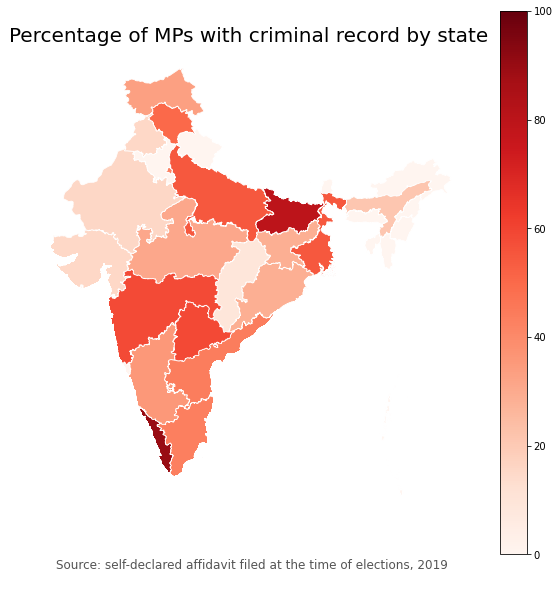

In [15]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.axis("off")
ax.set_title("Percentage of MPs with criminal record by state", fontdict={'fontsize': '20', 'fontweight' : '3','color':'#000000'})
ax.annotate('Source: self-declared affidavit filed at the time of elections, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=100))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

map_df.plot(column="percent_of_MPs_with_cases", cmap="Reds", linewidth=0.8, ax=ax, edgecolor='1')

In [16]:
fig.savefig("map_export.png", dpi=500)